In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
X=data.data
y=data.target

In [7]:
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scale)

In [10]:
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(pca.components_)

Original shape: (150, 4)
Transformed shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


In [11]:
# Vizualization

<Axes: >

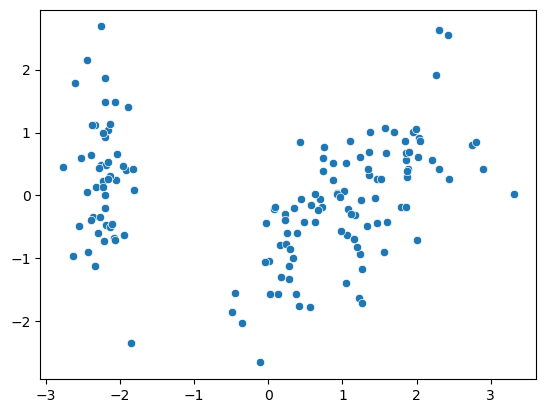

In [13]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1])

In [ ]:
from sklearn.cluster import KMeans
sse=[]
for k in range(2,21):
    model=KMeans(n_clusters=k)
    model.fit_predict(X_pca)
    sse.append(model.inertia_)

In [17]:
!pip install Kneed


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from kneed import KneeLocator
knee=KneeLocator(x=range(2,21),y=sse,curve="convex",direction="decreasing")
print("K=",knee.elbow)

K= 5


In [23]:
model_new=KMeans(n_clusters=3)
res=model_new.fit_predict(X_pca)


C:\Users\rudra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

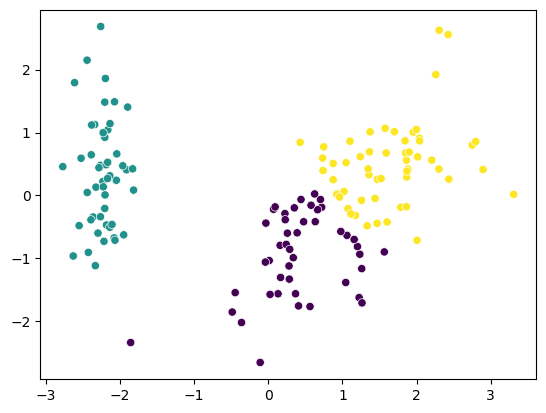

In [24]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],c=res)